<a href="https://colab.research.google.com/github/RafBD/CursoIntroPython/blob/main/EjerciciosCO/Trans_aprendizaje_categorical_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='orange'>**TRANSFERENCIA DE APRENDIZAJE:** </font>






In [ ]:
#Importar el modelo de interes
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/Dataset_TL_2/dataset_lp/train"
test_dir = "/content/drive/MyDrive/Dataset_TL_2/dataset_lp/test"

train_datagen = ImageDataGenerator(rescale=1/255., vertical_flip=True, rotation_range=100)

test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 198 images belonging to 5 classes.
Testing images:
Found 200 images belonging to 5 classes.


In [ ]:
imgs, labels = next(train_data)

In [ ]:
labels.shape

(32, 5)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

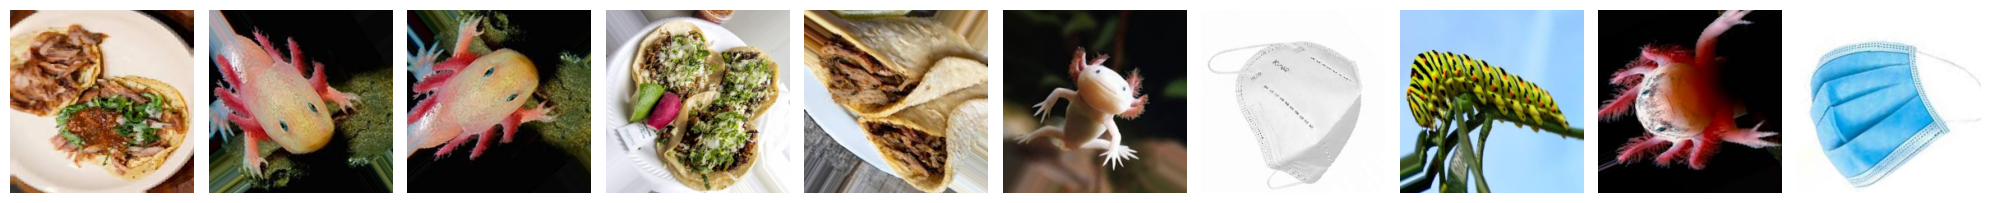

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 0 => ajolotes 1=>ardillas 2=>cubrebocas 3=>orugas 4=>tacos

In [ ]:
# Al cargar un modelo dado, el argumento " include_top " se puede establecer en False,
# en cuyo caso las capas de salida totalmente conectadas (DENSE) del modelo utilizado no se cargarán,
# esto permite agregar y entrenar una nueva capa de salida.
pre_trained_model = MobileNet(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# Se debe congelar el modelo base, es decir no se ajustarán los pesos del modelo base
pre_trained_model.trainable = False

### <font color='darkviolet'> **Definir utilizando Modelo Funcional de Keras para el entrenamiento**


In [ ]:
pre_trained_model.output

<KerasTensor: shape=(None, 7, 7, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>

In [ ]:
pre_trained_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
pre_trained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
# Agregar nuevas capas utlizando la API funcional de KERAS
x = Flatten()(pre_trained_model.output)
x = Dense(2048, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='tanh')(x)
x = Dense(16, activation='sigmoid')(x)
predicciones = Dense(5, activation='softmax')(x)

In [ ]:
# Crear modelo
modelo = Model(inputs=pre_trained_model.input, outputs=predicciones)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
# Compilar modelo
modelo.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# Entrenar modelo
history = modelo.fit(train_data, validation_data=test_data, epochs=100, batch_size=100)

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.5676 - accuracy: 0.3030

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 [==============================] - 87s 13s/step - loss: 1.5676 - accuracy: 0.3030 - val_loss: 1.4905 - val_accuracy: 0.4650
Epoch 2/100
7/7 [==============================] - 6s 965ms/step - loss: 1.4253 - accuracy: 0.5303 - val_loss: 1.3649 - val_accuracy: 0.6650
Epoch 3/100
7/7 [==============================] - 7s 1s/step - loss: 1.3124 - accuracy: 0.7980 - val_loss: 1.2689 - val_accuracy: 0.8350
Epoch 4/100
7/7 [==============================] - 6s 880ms/step - loss: 1.2337 - accuracy: 0.8990 - val_loss: 1.2053 - val_accuracy: 0.9050
Epoch 5/100
7/7 [==============================] - 7s 965ms/step - loss: 1.1700 - accuracy: 0.9242 - val_loss: 1.1537 - val_accuracy: 0.9650
Epoch 6/100
7/7 [==============================] - 7s 1s/step - loss: 1.1238 - accuracy: 0.9646 - val_loss: 1.1059 - val_accuracy: 0.9700
Epoch 7/100
7/7 [==============================] - 6s 951ms/step - loss: 1.0797 - accuracy: 0.9848 - val_loss: 1.0648 - val_accuracy: 0.9850
Epoch 8/100
7/7 [===============

In [ ]:
# Guardar el modelo en formato HDF5
modelo.save('/content/drive/MyDrive/Dataset_TL_2/modelmnet.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/Dataset_TL_2/dataset_lp/test/orugas/oruga (18).jpeg'
#img_path = './dataset/test/ardilla/ardilla (11).jpg'

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
img

In [ ]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)
preds = modelo.predict(X)

In [ ]:
preds.shape

In [ ]:
preds

In [ ]:
np.argmax(preds, axis=1)

In [ ]:
imgs, labels = next(test_data)

In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 0 => ajolotes 1=>ardillas 2=>cubrebocas 3=>orugas 4=>tacos

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

Liga de Drive con los modelos:
https://drive.google.com/drive/folders/19qHXdLjkQTqBC-sMkH-WAF5d86COVXbN?usp=drive_link